In [56]:
using Plots
using CSV
using Tables
using DataFrames
using Statistics
using StatsPlots

┌ Warning: Module Plots with build ID fafbfcfd-2667-ac24-0003-185760d5dfa5 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793


In [38]:
function linear2cartesian(s)
    return collect(Tuple(CartesianIndices((max_progress, max_power, max_h2o, max_o2, max_food))[s]))

end


linear2cartesian (generic function with 1 method)

In [13]:
infile = "OVERNIGHT DATA.csv"
df = CSV.read(infile, DataFrame, header = false)
Data = Matrix(df)
initial_state = df[1,1]
indices_restart = findall(x -> x == initial_state, df[:, 1])
steps = []

for i in 2:length(indices_restart)
    if (df[indices_restart[i]-1, 3] != 1000000)
        steps = push!(steps, 0)
    else 
        steps = push!(steps, (indices_restart[i] - indices_restart[i-1]))
    end
end


In [52]:
df = CSV.read("random_policy.csv", DataFrame)
random_steps = Matrix(df)


100×1 Matrix{Int64}:
 66
  0
 75
  0
 33
 52
 75
  0
 63
  0
  ⋮
 39
 48
 76
 81
 37
  0
 36
  0
 72

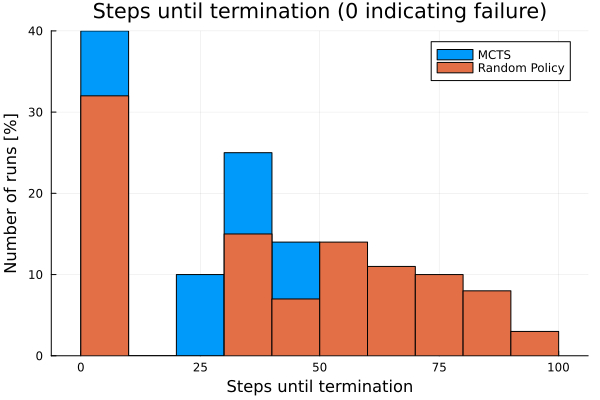

In [53]:

histogram(steps; bins = 0:10:100, label= "MCTS", title = "Steps until termination (0 indicating failure)" )
histogram!(random_steps; bins = 0:10:100, label= "Random Policy" )
ylabel!("Number of runs [%]")
xlabel!("Steps until termination")

In [57]:
#plot Mission Progress over Resources

# Dimensions
max_progress = 10
max_power = 50
max_h2o = 50
max_o2 = 50
max_food = 50

p1 = plot()
states = []
for i in 2:(length(indices_restart))

    states = Data[indices_restart[i-1]:(indices_restart[i]-1), 1]
    states = push!(states, Data[(indices_restart[i]-1), 4])
    states = stack([linear2cartesian(state) for state in states], dims = 1)
    
    mission = states[:,1]/max_progress
    resources_E = states[:, 2]/max_power
    resources_H2O = states[:,3]/max_h2o
    resources_oxy = states[:,4]/max_o2
    resources_food = states[:,5]/max_food
    resources_total = (resources_E  + resources_H2O + resources_oxy + resources_food)/(max_power + max_h2o + max_o2 + max_food)
    t = range(0, length=length(mission))

    plot!(p1, t, mission, legend=false, title = "Mission Progress")
    #plot!(p1, t, resources_E, legend=false, title = "Power Accumulation over Time")
    #plot!(p1, t, resources_H2O, legend=false, title = "Water Accumulation over Time")
    #plot!(p1, t, resources_oxy, legend=false, title = "Oxygen Accumulation over Time")
    #plot!(p1, t, resources_food, legend=false, title = "Food Accumulation over Time")

    vline!(p1, 10)
end

ylabel!("[%]")
xlabel!("Time [steps]")
#ylims!(0.9, (state_dimensions[1] + state_dimensions[2] + 1))
#xlims!(0.9, state_dimensions[3] + 0.5)

#savefig(p1, "Mission Progress VS Resources.pdf")

BoundsError: BoundsError: attempt to access 100×1 Matrix{Int64} at index [37, 4]

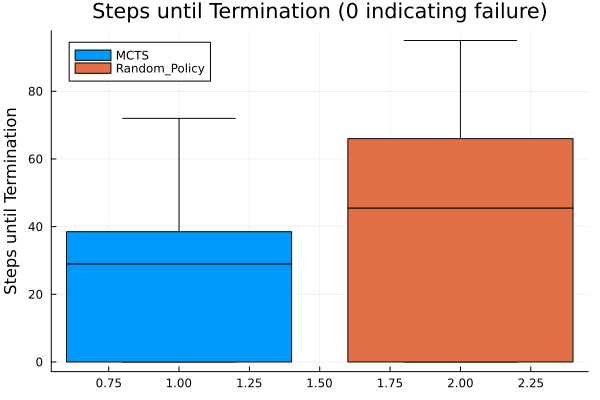

In [62]:
boxplot(steps, label="MCTS", ylabel="Steps until Termination", title="Steps until Termination (0 indicating failure)")
boxplot!(random_steps, label="Random_Policy")